In [62]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
# Load the dataset
train_data = pd.read_csv("Titanic-Dataset.csv")
test_data = pd.read_csv("Titanic-Dataset.csv")

In [66]:
# View the first few rows
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
# Check for missing values
train_data.info()
train_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [70]:
# Fill missing values
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)

In [72]:
# Convert categorical variables
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
train_data["Embarked"] = train_data["Embarked"].map({"C": 0, "Q": 1, "S": 2})


In [74]:
# Drop unnecessary columns
train_data.drop(["Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [76]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = train_data[features]
y = train_data["Survived"]

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [80]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [84]:
# Predictions
y_pred = model.predict(X_test)


In [86]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [88]:
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
test_data["Embarked"] = test_data["Embarked"].map({"C": 0, "Q": 1, "S": 2})

In [92]:
columns_to_drop=['Name', 'Ticket', 'Cabin']
existing_columns=[col for col in columns_to_drop if col in test_data.columns]             
test_data.drop(existing_columns, axis=1, inplace=True)


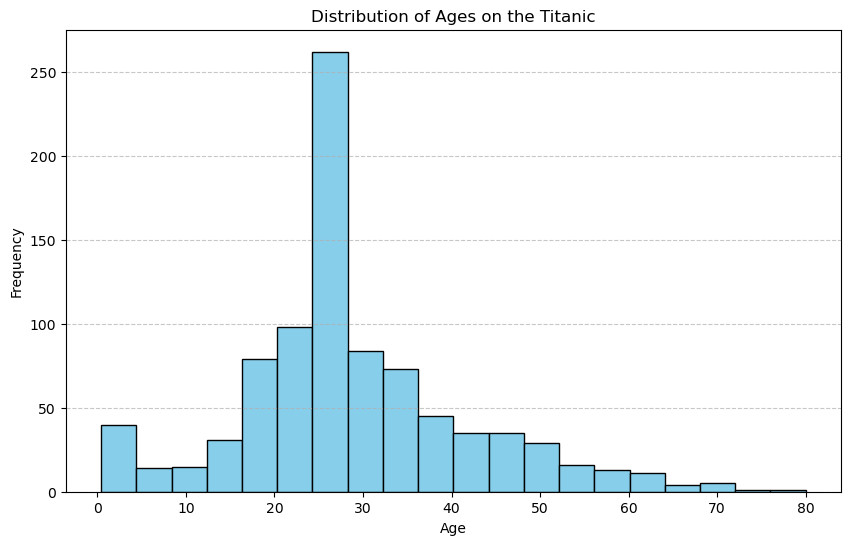

In [94]:

import matplotlib.pyplot as plt

# Ensure 'Age' is numeric and drop missing values
train_data["Age"] = pd.to_numeric(train_data["Age"], errors="coerce")
age_data = train_data["Age"].dropna()

# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(age_data, bins=20, color='skyblue', edgecolor='black')  # Ensure 'color' is a single value
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Ages on the Titanic")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



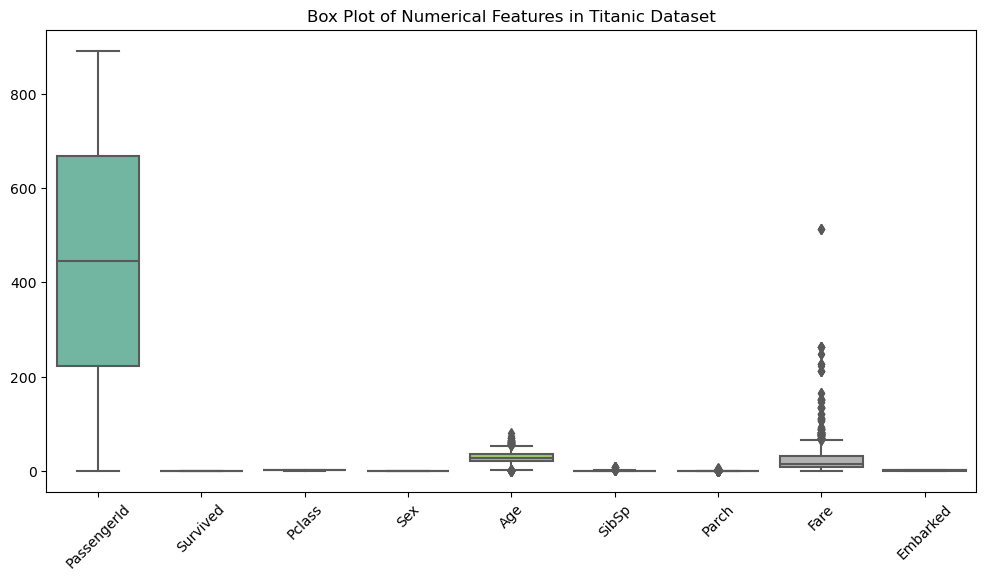

In [96]:


import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numerical_cols = train_data.select_dtypes(include=['number']).columns

# Create box plots for all numerical columns with colors
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data[numerical_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Box Plot of Numerical Features in Titanic Dataset")
plt.show()



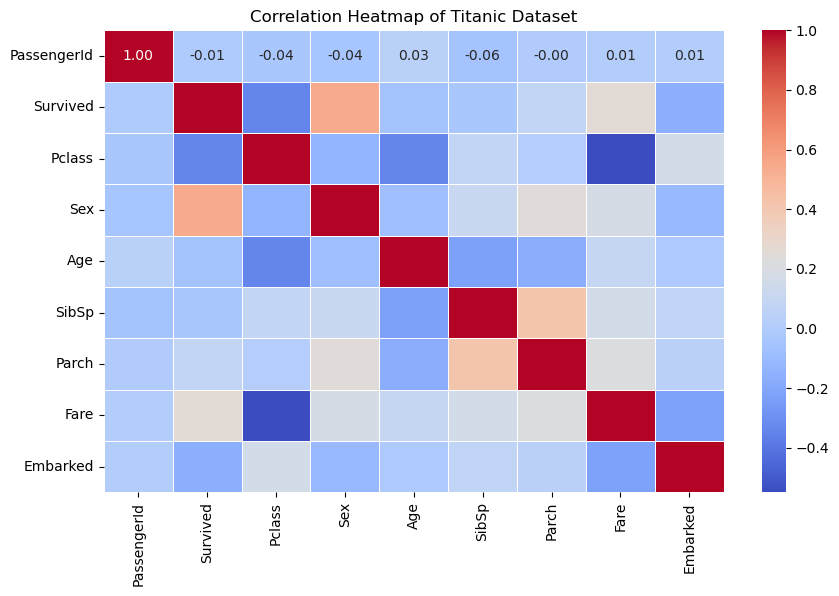

In [47]:

import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical variables to numerical if needed
df_encoded = train_data.select_dtypes(include=['number'])  # Selecting only numerical columns

# Compute correlation matrix
corr_matrix = df_encoded.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()


C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrvis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

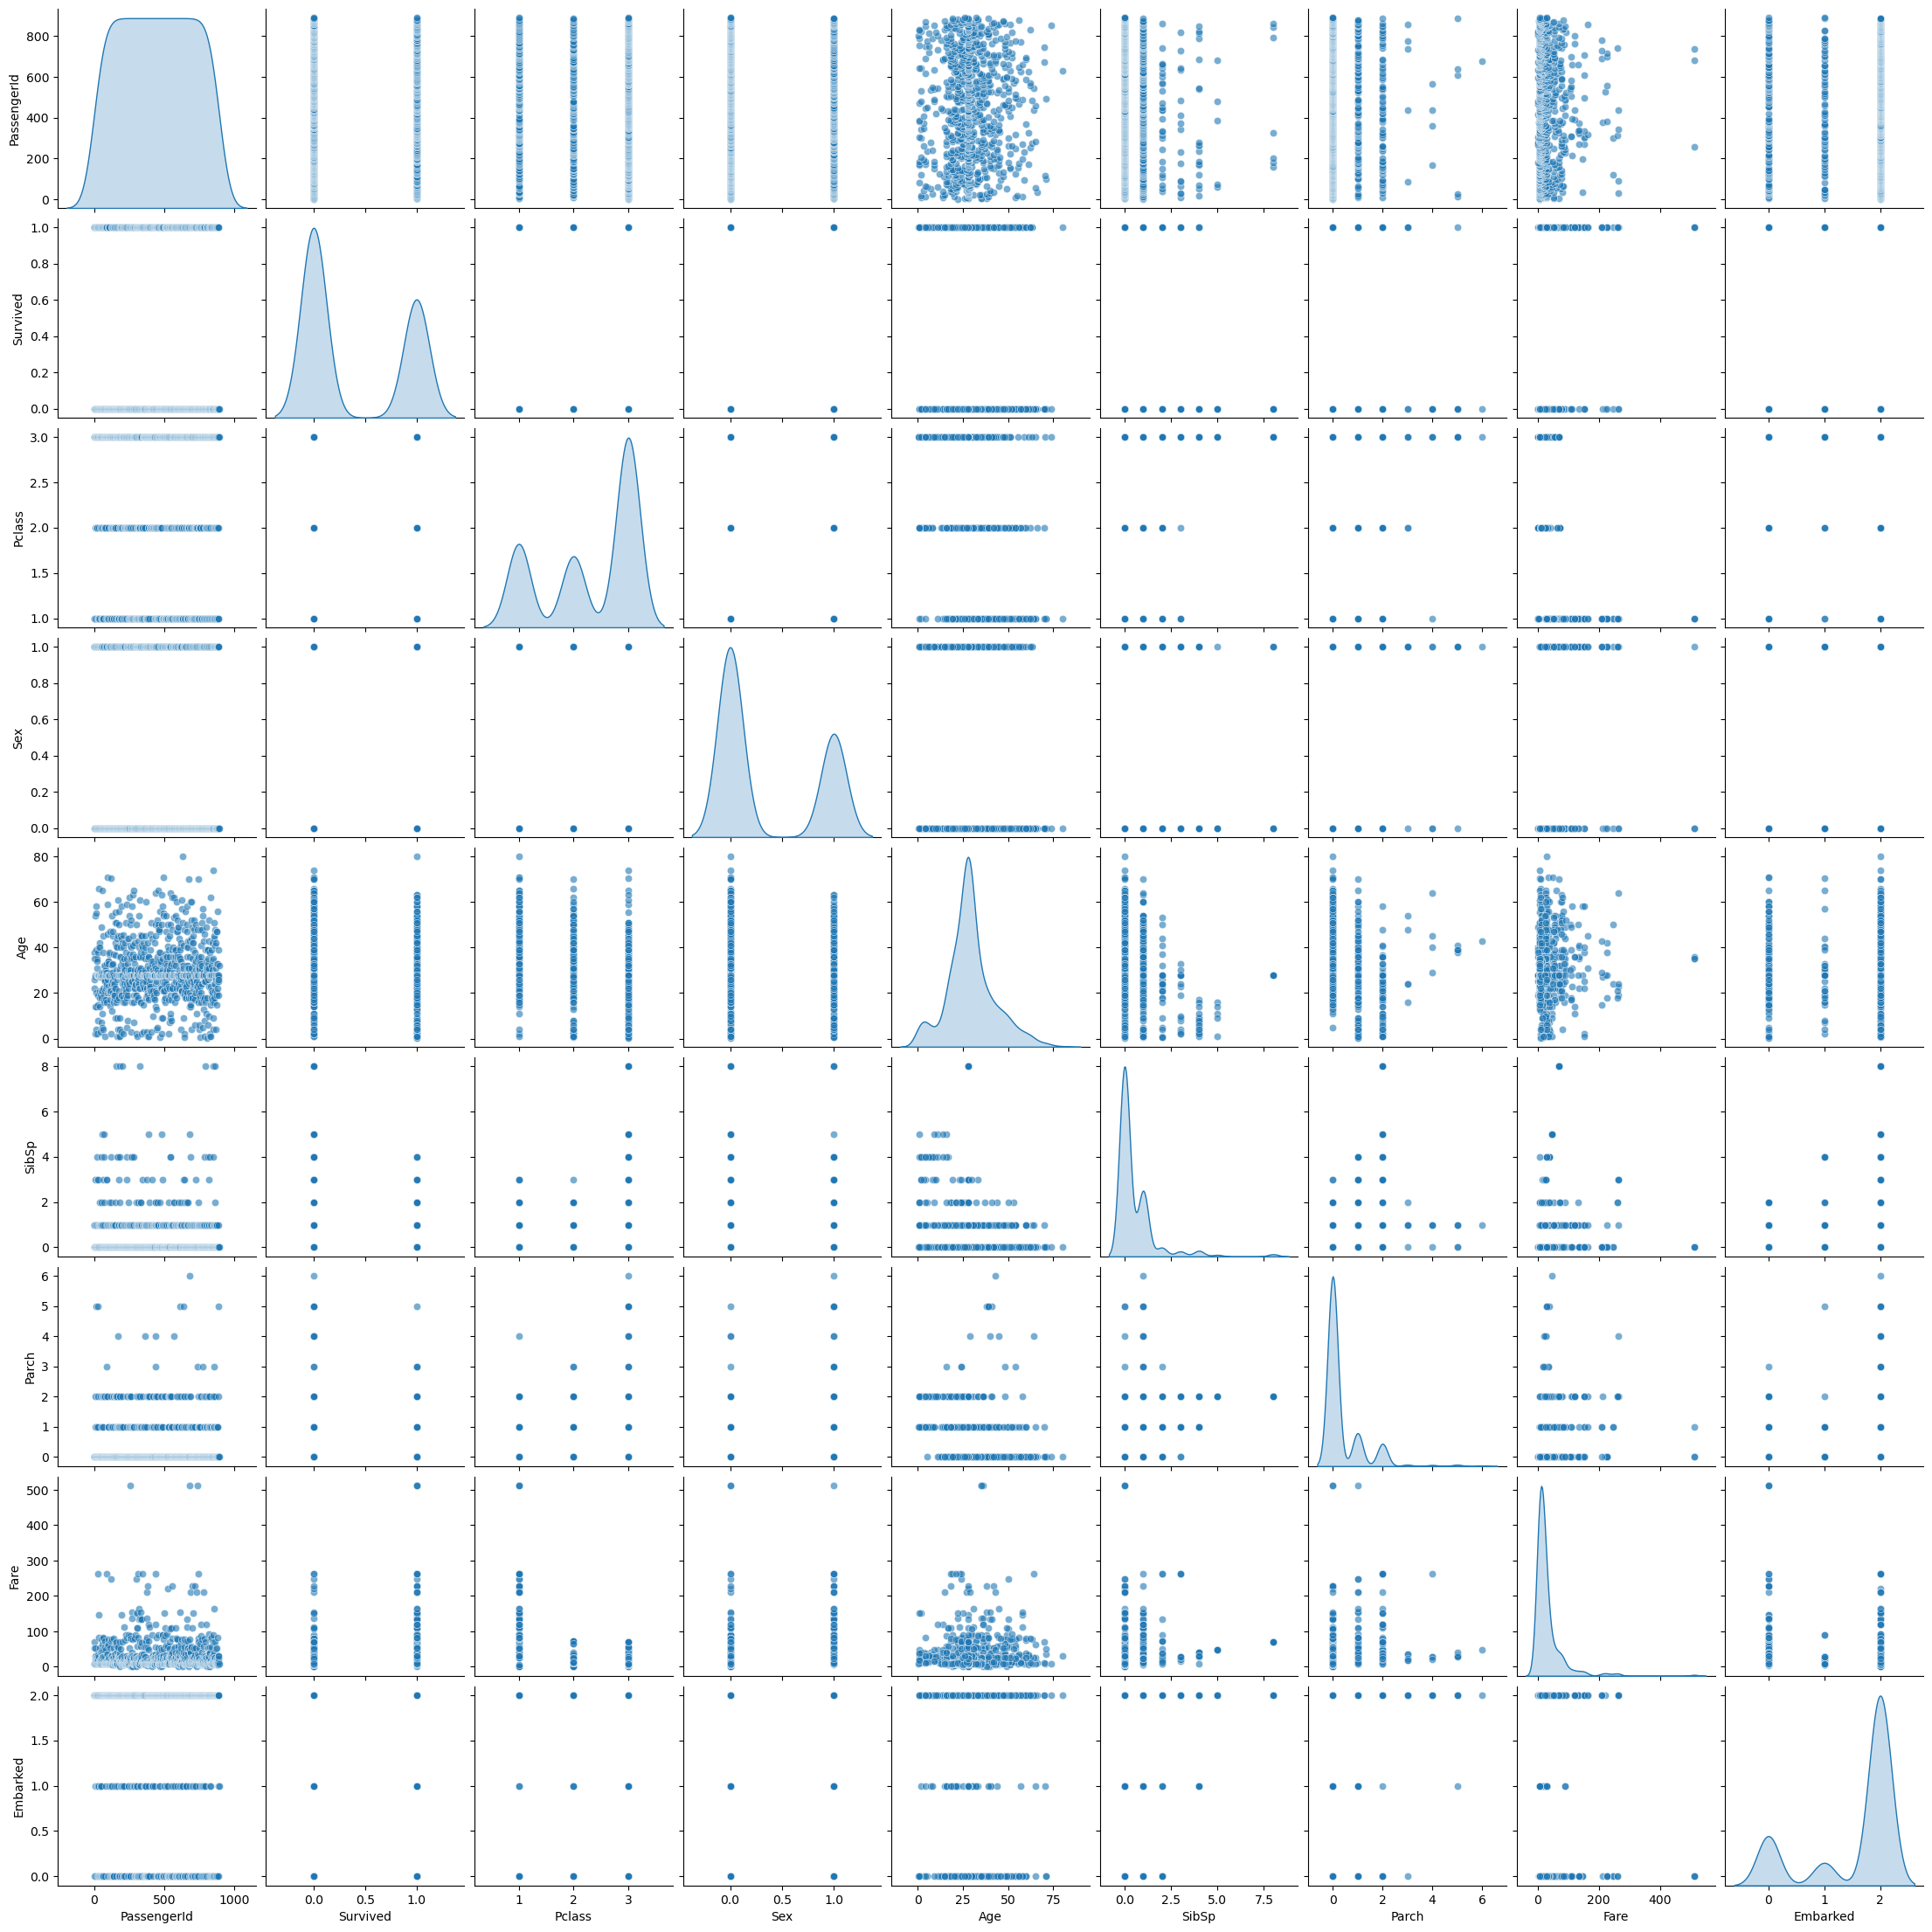

In [112]:

import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns correctly
numerical_cols = train_data.select_dtypes(include=['number'])  
# Create a pairplot
sns.pairplot(numerical_cols, diag_kind='kde', markers="o", plot_kws={'alpha':0.6})

# Show the plot
plt.show()


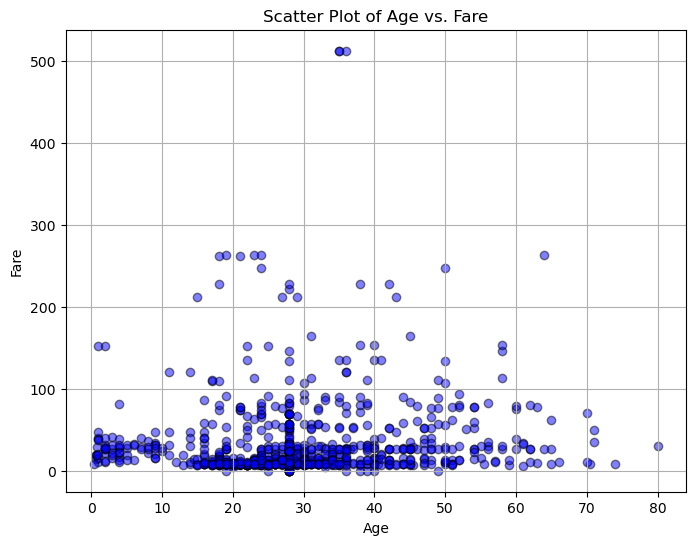

In [116]:

import matplotlib.pyplot as plt

# Drop rows with missing values in Age or Fare
train_data = train_data.dropna(subset=['Age', 'Fare'])

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_data['Age'], train_data['Fare'], alpha=0.5, color='blue', edgecolors='k')
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatter Plot of Age vs. Fare")
plt.grid(True)
plt.show()
